<a href="https://colab.research.google.com/github/BhavikaTiwari/Laptop-Price-Analysis-and-Prediction-using-Machine-Learning/blob/main/Laptop_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/laptop_price (3).csv",encoding = 'latin')
df.head

<bound method NDFrame.head of       laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    1440x900   
2               Notebook    15.6                           Full HD 1920x1080   
3              Ultrabook    15.4          IPS Panel Retina Display 2880x1800   
4              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
...                  ...     ...                                         ...   
1298  2 in 1 Convertible    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299  2 in 1 Convertible    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300            Notebook    14.0                                    1366x768   
1301            Notebook    15.6                                    1366x768   
1302            Notebook    15.6                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight  Price_euros  
0     Intel Iris Plus Graphics 640       macOS  1.37kg      1339.69  
1           Intel HD Graphics 6000       macOS  1.34kg       898.94  
2            Intel HD Graphics 620       No OS  1.86kg       575.00  
3               AMD Radeon Pro 455       macOS  1.83kg      2537.45  
4     Intel Iris Plus Graphics 650       macOS  1.37kg      1803.60  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg       638.00  
1299         Intel HD Graphics 520  Windows 10   1.3kg      1499.00  
1300             Intel HD Graphics  Windows 10   1.5kg       229.00  
1301            AMD Radeon R5 M330  Windows 10  2.19kg       764.00  
1302             Intel HD Graphics  Windows 10   2.2kg       369.00  

[1303 rows x 13 columns]>

In [ ]:
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.sample(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
1244,1262,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54kg,1099.99
65,67,Asus,ZenBook Pro,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,1.8kg,1983.00


In [ ]:
df.drop(columns = ['laptop_ID'],inplace = True)

In [ ]:
df.drop(columns = ['Product'],inplace = True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
df.duplicated().sum()

np.int64(29)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(1274, 11)

In [ ]:
df['Price'] = round(df['Price_euros']*89.66).astype('int')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120117
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80599
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51554
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,227508
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,161711


In [ ]:
1339.69 * 89.66  #price conversion check

120116.6054

In [ ]:
df.drop(columns = ['Price_euros'], inplace = True)

In [ ]:
df.sample

<bound method NDFrame.sample of      Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4GB            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   

                               Gpu       OpSys  Weight   Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg  120117  
1           Intel HD Graphics 6000       macOS  1.34kg   80599  
2            Intel HD Graphics 620       No OS  1.86kg   51554  
3               AMD Radeon Pro 455       macOS  1.83kg  227508  
4     Intel Iris Plus Graphics 650       macOS  1.37kg  161711  
...                            ...         ...     ...     ...  
1269           Nvidia GeForce 920M  Windows 10   2.2kg   64584  
1270         Intel HD Graphics 520  Windows 10   1.8kg   57203  
1271         Intel HD Graphics 520  Windows 10   1.3kg  134400  
1272             Intel HD Graphics  Windows 10   1.5kg   20532  
1273            AMD Radeon R5 M330  Windows 10  2.19kg   68500  

[1274 rows x 11 columns]>

<Axes: xlabel='Company'>

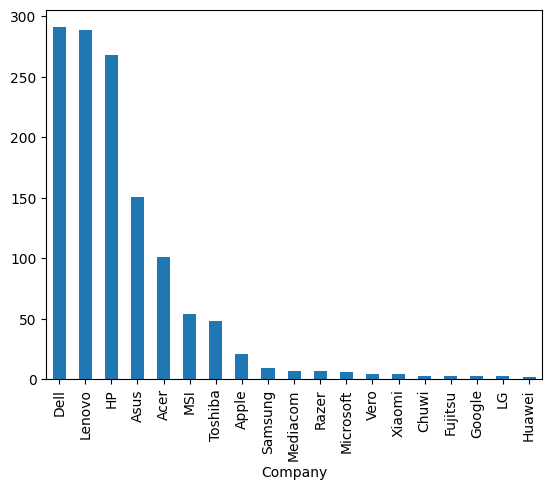

In [ ]:
#EDA #Before filtering
df['Company'].value_counts().plot(kind = 'bar')

In [ ]:
#Groupby to get the average amount of each brand
df.groupby('Company')['Price'].mean()

,Price
Company,
Acer,56796.415842
Apple,140246.142857
Asus,101210.741722
Chuwi,28179.666667
Dell,107522.474227
Fujitsu,65362.000000
Google,150419.333333
HP,96860.981343
Huawei,127675.500000


<Axes: xlabel='Company'>

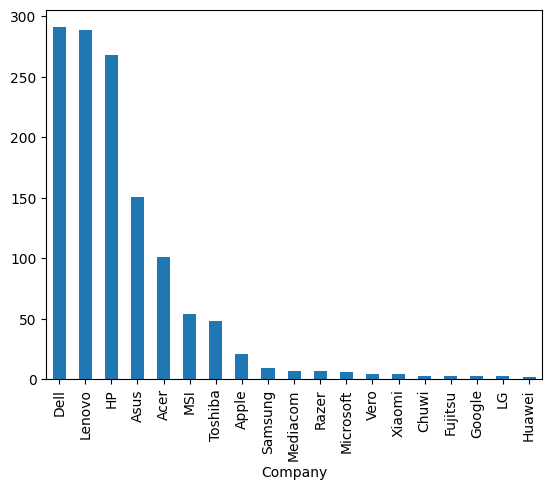

In [ ]:
df['Company'].value_counts().plot(kind = 'bar') #After filtering

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,120117
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80599
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51554
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,227508
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161711


In [ ]:
df.reset_index(drop = True, inplace = True)

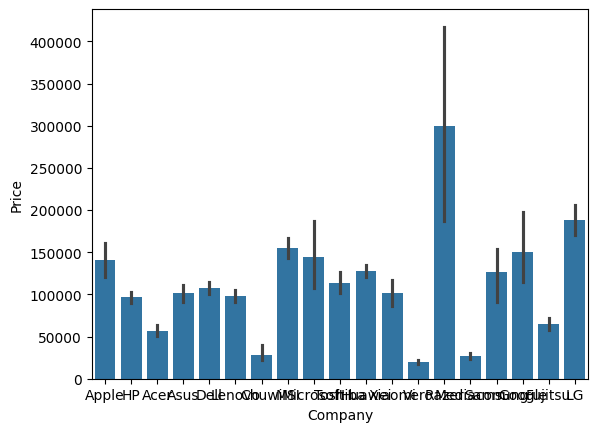

In [ ]:
sns.barplot(x='Company', y='Price', data = df)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
19,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22kg,87777


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,706
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


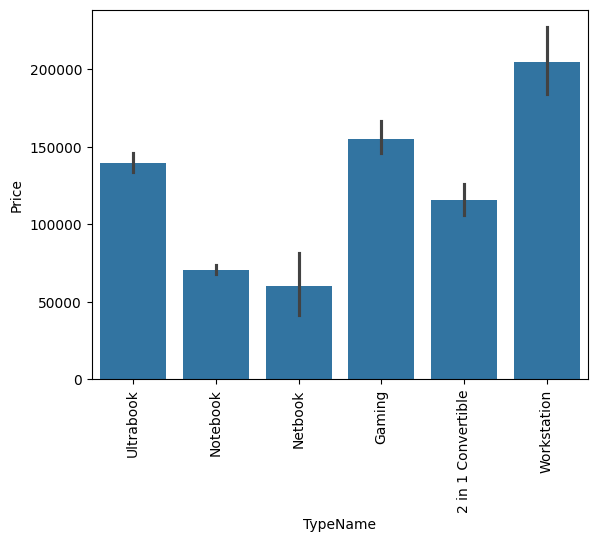

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,646
14.0,193
17.3,164
13.3,160
12.5,39
11.6,31
13.5,6
12.0,6
13.9,6


<Axes: xlabel='Inches'>

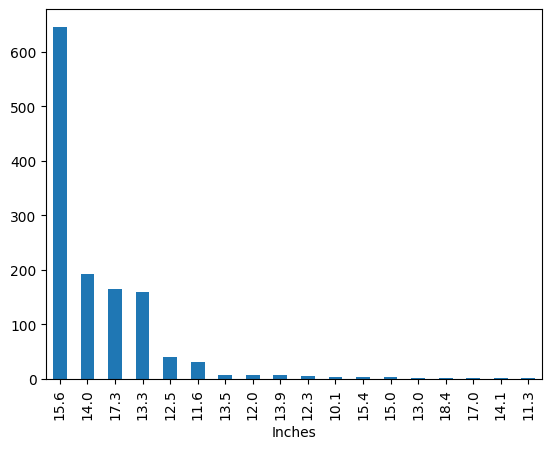

In [ ]:
df['Inches'].value_counts().plot(kind='bar')

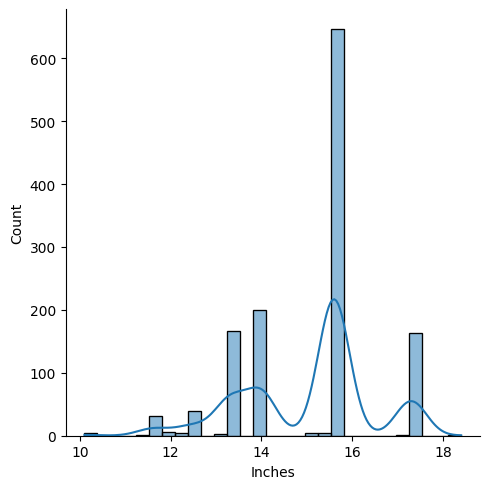

In [ ]:
sns.displot(df['Inches'],kde=True)

1. The smooth curve overlays the histogram and represents the estimated probability density function

2. Peaks in the curve indicate where the data points are concentrated

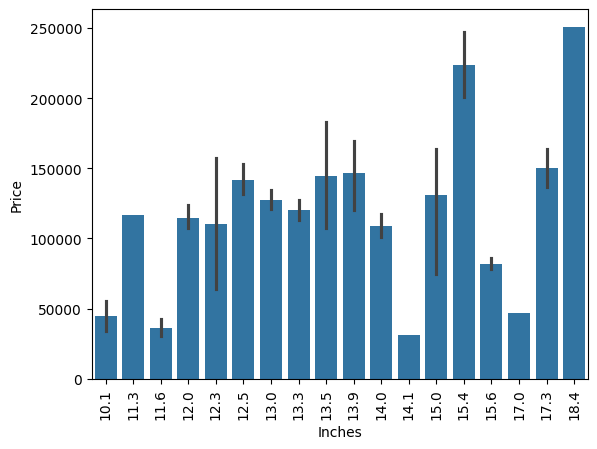

In [ ]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

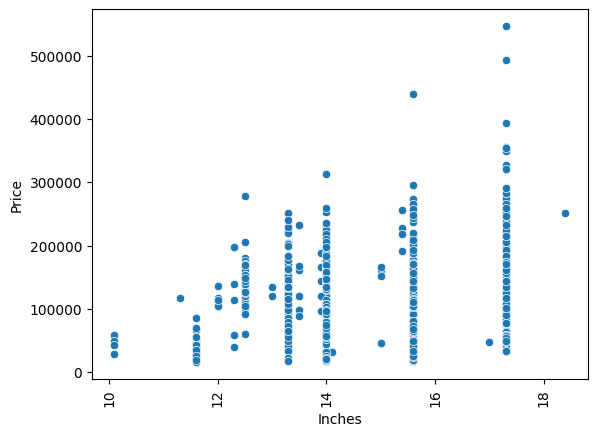

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,505
1366x768,262
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,51
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
#X_Res
#Y_Res

In [ ]:
a = 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160'
type(a)

str

In [ ]:
a.split()

['IPS', 'Panel', 'Touchscreen', '/', '4K', 'Ultra', 'HD', '3840x2160']

In [ ]:
a.split()[-1].split('x')

['3840', '2160']

In [ ]:
a.split()[-1].split('x')[0]

'3840'

In [ ]:
a.split()[-1].split('x')[1]

'2160'

In [ ]:
(lambda x : x.split()[-1].split('x')[0])('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')

'3840'

In [ ]:
(lambda x : x.split()[-1].split('x')[1])('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')

'2160'

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
960,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,137628


In [ ]:
df['X_Res'] = df['ScreenResolution'].apply(lambda x : x.split()[-1].split('x')[0]).astype('int')

In [ ]:
df['Y_Res'] = df['ScreenResolution'].apply(lambda x : x.split()[-1].split('x')[1]).astype('int')

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res
991,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.1kg,44740,1920,1080


In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,505
1366x768,262
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,51
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
a = 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160'

In [ ]:
(lambda a :1 if "Touchscreen" in a else 0)('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')

1

In [ ]:
(lambda a :1 if "IPS" in a else 0)('IPS Panel Touchscreen / 4K Ultra HD 3840x2160')

1

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply((lambda a :1 if "Touchscreen" in a else 0))

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
291,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,106426,1920,1080,0


In [ ]:
df.drop(columns = ['ScreenResolution'],inplace = True)

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,120117,2560,1600,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80599,1440,900,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51554,1920,1080,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,227508,2880,1800,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161711,2560,1600,0


In [ ]:
df.shape

(1274, 13)

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
606,Toshiba,Notebook,15.6,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,125434,1920,1080,0


In [ ]:
df['Cpu']

,Cpu
0,Intel Core i5 2.3GHz
1,Intel Core i5 1.8GHz
2,Intel Core i5 7200U 2.5GHz
3,Intel Core i7 2.7GHz
4,Intel Core i5 3.1GHz
...,...
1269,Intel Core i7 6500U 2.5GHz
1270,Intel Core i7 6500U 2.5GHz
1271,Intel Core i7 6500U 2.5GHz
1272,Intel Celeron Dual Core N3050 1.6GHz


<Axes: xlabel='Cpu'>

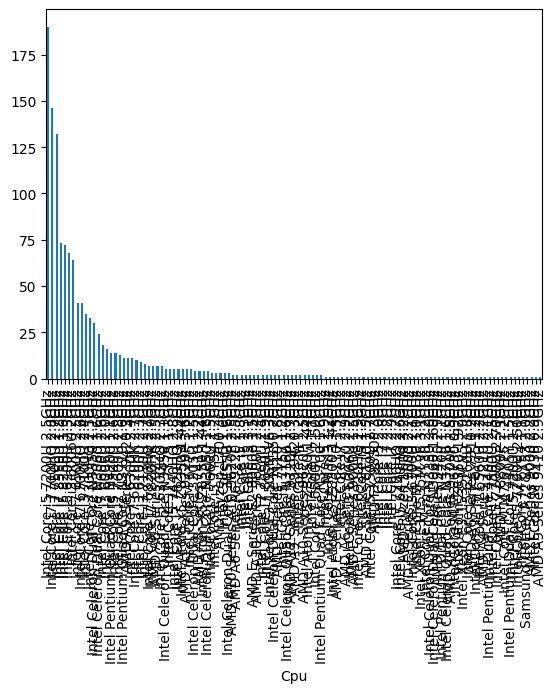

In [ ]:
df['Cpu'].value_counts().plot(kind='bar')

In [ ]:
#I want to fetch the first 3 words i.e Intel Core i5/i7/i3....
#I just want to fetch the Series of AMD i.e E/A/D....
#Wherever i have somtheing like (Intel Celeron Dual Core N3050 1.6GHz/Intel Pentium / Intel Quad ) i want to categorize it as intel CPU

In [ ]:
a = 'Intel Core i5 7200U 2.5GHz'

In [ ]:
a.split()

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [ ]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [ ]:
#Intel core i5

In [ ]:
" ".join(a.split()[0:3])

'Intel Core i5'

In [ ]:
(lambda a : " ".join(a.split()[0:3]))('Intel Core i5 7200U 2.5GHz')

'Intel Core i5'

In [ ]:
df['Cpu'] = df['Cpu'].apply(lambda a : " ".join(a.split()[0:3]))

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,515
Intel Core i5,423
Intel Core i3,134
Intel Celeron Dual,69
Intel Pentium Quad,27
Intel Core M,17
AMD A9-Series 9420,12
AMD A6-Series 9220,8
Intel Celeron Quad,8


In [ ]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    if text[4] == 'E':
      return 'AMD E Series Processor'
    elif text[4] == 'A':
      return 'AMD A Series Processor'
    elif text[4] == 'D':
      return 'AMD D Series Processor'
    elif text[4] == 'F':
      return 'AMD F Series Processor'
    else:
      return 'AMD Ryzen Series'

In [ ]:
fetch_processor(df['Cpu'][5])

'AMD A Series Processor'

In [ ]:
df['Cpu'] =  df['Cpu'].apply(fetch_processor)

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,515
Intel Core i5,423
Other Intel Processor,141
Intel Core i3,134
AMD A Series Processor,45
AMD E Series Processor,9
AMD Ryzen Series,5
AMD F Series Processor,2


<Axes: xlabel='Cpu'>

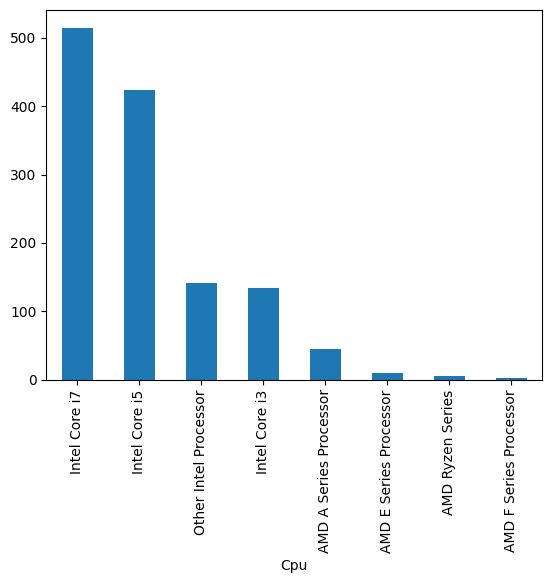

In [ ]:
df['Cpu'].value_counts().plot(kind='bar')

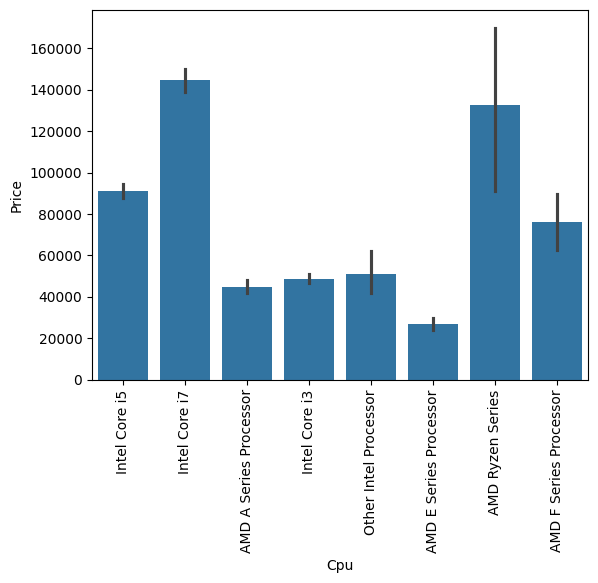

In [ ]:
sns.barplot(x=df['Cpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
529,Dell,Notebook,15.6,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,123462,1920,1080,0


In [ ]:
df['Ram'].value_counts()

,count
Ram,
8GB,613
4GB,366
16GB,198
6GB,35
12GB,25
32GB,17
2GB,16
24GB,3
64GB,1


In [ ]:
a = '4GB'

In [ ]:
a.replace("GB","")

'4'

In [ ]:
df['Ram'] = df['Ram'].apply(lambda a : a.replace("GB","")).astype('int')

<Axes: xlabel='Ram'>

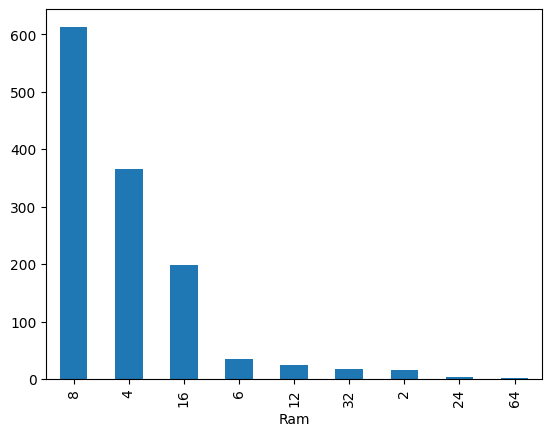

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

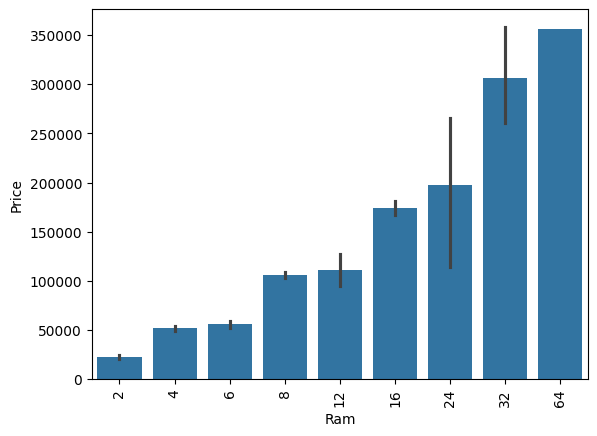

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
984,Toshiba,Notebook,14.0,Intel Core i5,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.75kg,82039,1366,768,0


In [ ]:
 #SSD
#HDD
#SSD+HDD
#Flash Storage
#SSD + SSD
#Flash Storage + HdD
#SSD + Hybrid
#HDD + HHD
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,215
500GB HDD,123
512GB SSD,114
128GB SSD + 1TB HDD,94
128GB SSD,74
256GB SSD + 1TB HDD,73
32GB Flash Storage,36
2TB HDD,16


In [ ]:
df.drop(columns = ['Memory'], inplace = True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
1184,HP,Notebook,15.6,Intel Core i7,6,Nvidia GeForce GTX 960M,Windows 10,2.18kg,71638,1920,1080,0


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,279
Intel HD Graphics 520,181
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [ ]:
a = 'Intel HD Graphics 620'

In [ ]:
a.split()[0:2]

['Intel', 'HD']

In [ ]:
" ".join(a.split()[0:2])

'Intel HD'

In [ ]:
lambda a : " ".join(a.split()[0:2])

<function __main__.<lambda>(a)>

In [ ]:
df['Gpu'] = df['Gpu'].apply(lambda a : " ".join(a.split()[0:2]))

In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,620
Nvidia GeForce,364
AMD Radeon,167
Intel UHD,68
Nvidia Quadro,31
Intel Iris,14
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


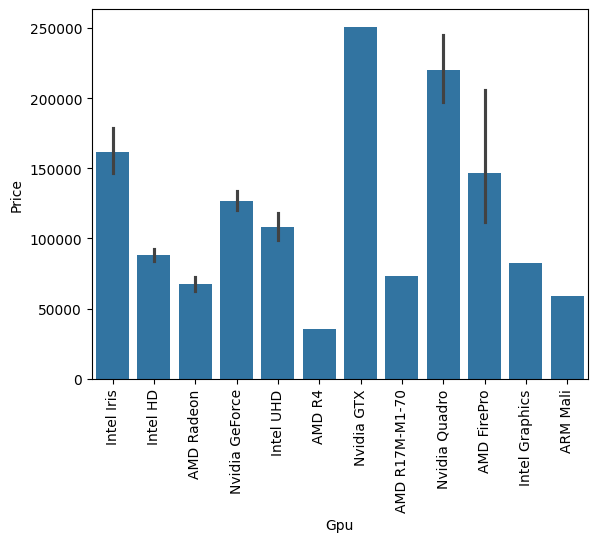

In [ ]:
sns.barplot(x=df['Gpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
107,Asus,Ultrabook,14.0,Intel Core i7,8,Nvidia GeForce,Windows 10,1.3kg,106964,1920,1080,0


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1047
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
#Wherever we have windows 10 or windows 10 S >>> Windows 10
#Windows 7 >>> Windows 7
#If we have Mac OS X or macOS >>> Mac oS
#If No OS  >>> No OS
#Chrome/Linux/Android

In [ ]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return 'Windows 10'
  elif text == 'Windows 7':
    return 'Windows 7'
  elif text == 'Mac OS X' or text == 'macOS':
    return 'Mac OS'
  elif text == 'No OS':
    return 'No OS'
  else:
    return 'Chrome/Linux/Android'

In [ ]:
os('Linux')

'Chrome/Linux/Android'

In [ ]:
df['OpSys'] = df['OpSys'].apply(os)

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1055
Chrome/Linux/Android,87
No OS,66
Windows 7,45
Mac OS,21


<Axes: xlabel='OpSys'>

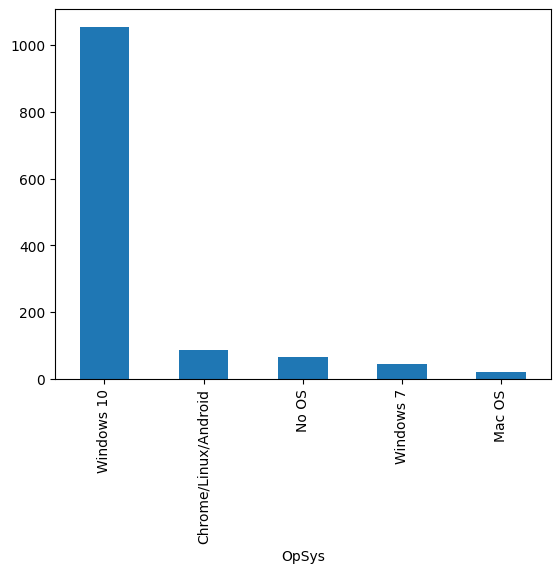

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris,Mac OS,1.37kg,120117,2560,1600,0
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel HD,Mac OS,1.34kg,80599,1440,900,0
2,HP,Notebook,15.6,Intel Core i5,8,Intel HD,No OS,1.86kg,51554,1920,1080,0
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD Radeon,Mac OS,1.83kg,227508,2880,1800,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris,Mac OS,1.37kg,161711,2560,1600,0


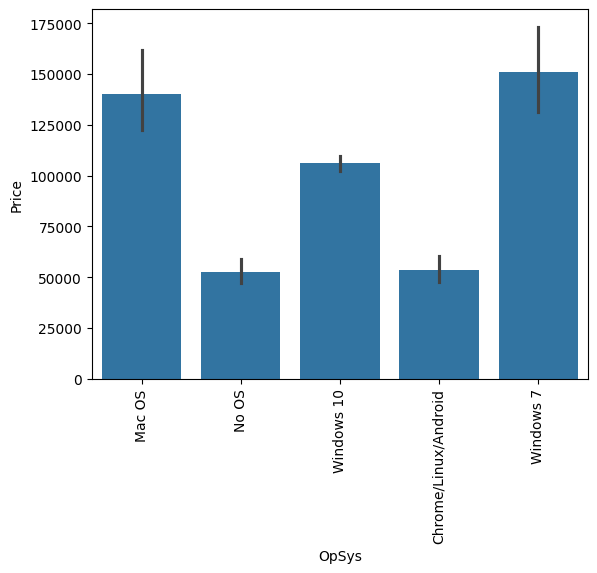

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.shape

(1274, 12)

In [ ]:
df['Weight'] = df['Weight'].apply(lambda a : a.replace("kg","")).astype('float')

In [ ]:
df['Weight'].describe()

,Weight
count,1274.000000
mean,2.040400
std,0.669444
min,0.690000
25%,1.500000
50%,2.040000
75%,2.310000
max,4.700000


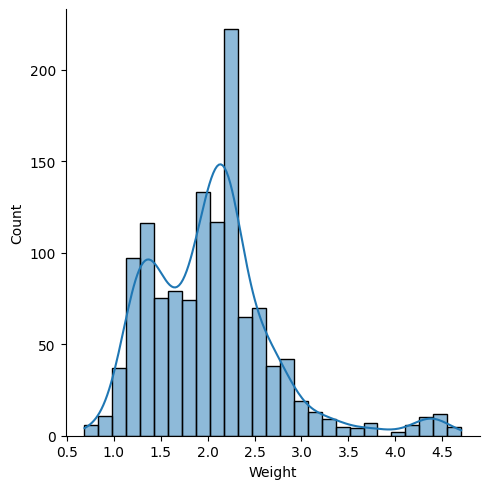

In [ ]:
sns.displot(x=df['Weight'],kde=True)
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

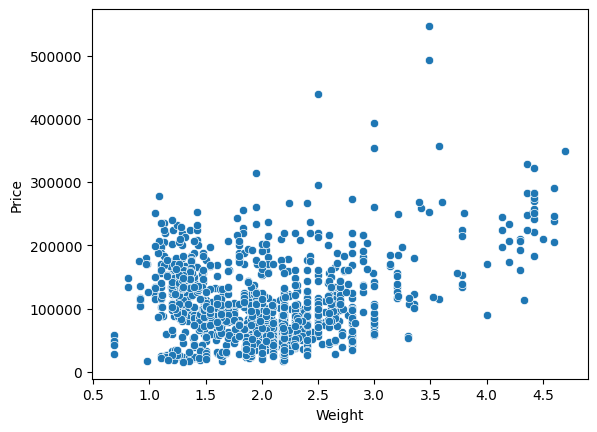

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen
1086,HP,Workstation,15.6,Intel Core i7,8,AMD FirePro,Windows 7,1.9,134042,1920,1080,0


In [ ]:
df['Y_Res'].value_counts()

,count
Y_Res,
1080,833
768,289
2160,43
1440,31
1800,29
900,27
1600,10
1504,6
1200,5


In [ ]:
df.corr(numeric_only=True)['Price'] #

,Price
Inches,0.066990
Ram,0.740106
Weight,0.212192
Price,1.000000
X_Res,0.552074
Y_Res,0.548111
Touchscreen,0.188630


In [ ]:
#ppi Pixels per inches
df['ppi']= round(((df['X_Res']**2) + (df['Y_Res']**2))**0.5 /df['Inches'])

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_Res,Y_Res,Touchscreen,ppi
379,Acer,Notebook,15.6,Intel Core i7,8,Nvidia GeForce,Chrome/Linux/Android,2.4,75852,1920,1080,0,141.0


In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Inches,0.066990
Ram,0.740106
Weight,0.212192
Price,1.000000
X_Res,0.552074
Y_Res,0.548111
Touchscreen,0.188630
ppi,0.469637


In [ ]:
df.shape

(1274, 13)

In [ ]:
df.drop(columns = ['Inches','X_Res','Y_Res'],inplace = True)

In [ ]:
df.shape

(1274, 10)

<Axes: xlabel='ppi', ylabel='Price'>

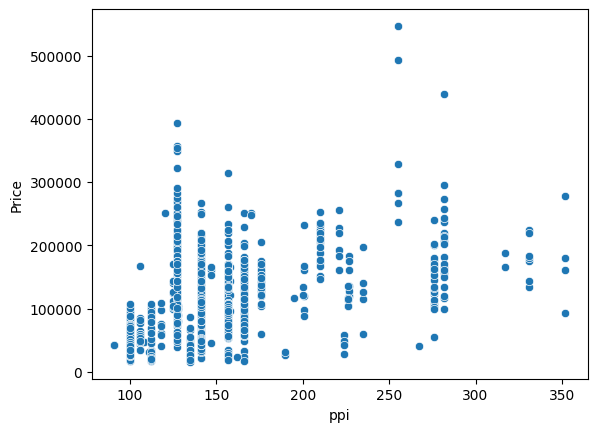

In [ ]:
sns.scatterplot(x =df['ppi'], y = df['Price'])

In [ ]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1086
1,188


<Axes: xlabel='Touchscreen'>

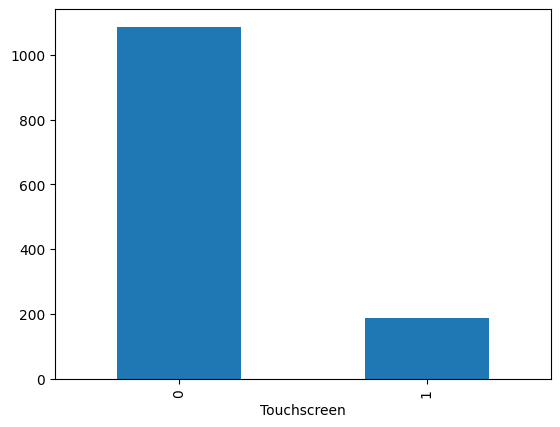

In [ ]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

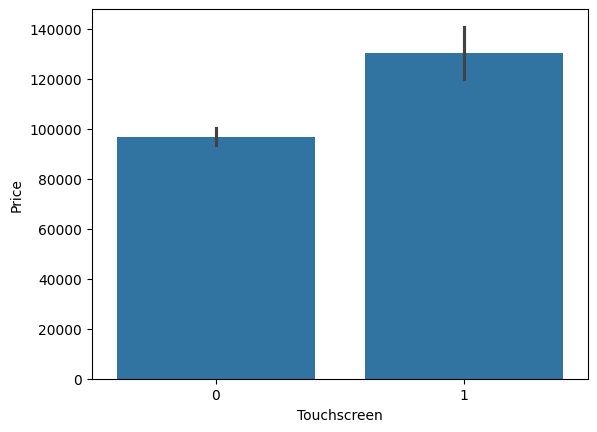

In [ ]:
sns.barplot(x = df['Touchscreen'],y = df['Price'])

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris,Mac OS,1.37,120117,0,227.0
1,Apple,Ultrabook,Intel Core i5,8,Intel HD,Mac OS,1.34,80599,0,128.0
2,HP,Notebook,Intel Core i5,8,Intel HD,No OS,1.86,51554,0,141.0
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon,Mac OS,1.83,227508,0,221.0
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris,Mac OS,1.37,161711,0,227.0


In [ ]:
df['ppi'].describe()

,ppi
count,1274.000000
mean,146.827316
std,43.054670
min,91.000000
25%,127.000000
50%,141.000000
75%,157.000000
max,352.000000


In [ ]:
df.to_csv("Cleaned_data.csv") #Exporting the cleaned data in csv format

In [ ]:
#ML > LR > DTR > KNN > RFR > Lasso  and Ridge   > Adaboost > GDB

#One Hot Encoding

In [ ]:
#Training And Deploying
#Feature Scaling  > Standardization > Normalization  >>> when and where
#Imbalance Data >> Undersampling > Oversampling

In [ ]:
#  One Hot Encoder >>> Human Lang >> Machine Lang 0,1
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ppi
793,Lenovo,2 in 1 Convertible,Intel Core i5,8,AMD Radeon,Windows 10,2.08,85984,1,141.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1274 non-null   object 
 1   TypeName     1274 non-null   object 
 2   Cpu          1274 non-null   object 
 3   Ram          1274 non-null   int64  
 4   Gpu          1274 non-null   object 
 5   OpSys        1274 non-null   object 
 6   Weight       1274 non-null   float64
 7   Price        1274 non-null   int64  
 8   Touchscreen  1274 non-null   int64  
 9   ppi          1274 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 99.7+ KB


In [ ]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
#Machine Learning
#1.Define I/P n O/P columns

In [ ]:
X = df.drop(columns = ['Price'])  #I/P
X

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris,Mac OS,1.37,0,227.0
1,Apple,Ultrabook,Intel Core i5,8,Intel HD,Mac OS,1.34,0,128.0
2,HP,Notebook,Intel Core i5,8,Intel HD,No OS,1.86,0,141.0
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon,Mac OS,1.83,0,221.0
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris,Mac OS,1.37,0,227.0
...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7,4,Nvidia GeForce,Windows 10,2.20,0,100.0
1270,Lenovo,2 in 1 Convertible,Intel Core i7,4,Intel HD,Windows 10,1.80,1,157.0
1271,Lenovo,2 in 1 Convertible,Intel Core i7,16,Intel HD,Windows 10,1.30,1,276.0
1272,Lenovo,Notebook,Other Intel Processor,2,Intel HD,Windows 10,1.50,0,112.0


In [ ]:
y = df['Price']   #O/P
y

,Price
0,120117
1,80599
2,51554
3,227508
4,161711
...,...
1269,64584
1270,57203
1271,134400
1272,20532


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.15 , random_state = 42)

In [ ]:
y_train

,Price
538,161298
950,201645
170,120951
296,87777
1063,88763
...,...
1044,89660
1095,71638
1130,56396
860,76270


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression ,Lasso , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ppi
499,Lenovo,Notebook,Intel Core i5,8,Intel HD,Windows 10,2.3,81680,0,141.0


In [ ]:
#Linear Regression
categorical_features = ['Company','TypeName','Cpu','Gpu','OpSys']

step1 =ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse_output= False , handle_unknown='ignore'),categorical_features)
],remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1',step1) , ('step2',step2)])

pipe.fit(X_train , y_train)

pipe.predict(X_test)

y_pred = pipe.predict(X_test)


print("R2 Score",r2_score(y_test , y_pred))
print("MAE",mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test , y_pred))


R2 Score 0.7716249638072916
MAE 22407.021735263872
MSE 1142366168.201368


In [ ]:
X_test

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,ppi
309,HP,Notebook,Intel Core i3,4,Intel HD,Windows 10,1.86,0,141.0
622,Dell,Notebook,Intel Core i5,4,AMD Radeon,Windows 10,2.20,0,141.0
184,Xiaomi,Notebook,Intel Core i5,8,Nvidia GeForce,No OS,1.95,0,141.0
705,Dell,Notebook,Intel Core i5,8,Intel HD,Windows 10,2.18,0,141.0
522,Dell,Notebook,Intel Core i5,8,Intel HD,Windows 10,1.64,0,157.0
...,...,...,...,...,...,...,...,...,...
1008,HP,Notebook,Intel Core i5,8,Nvidia GeForce,Windows 10,1.64,0,157.0
1134,Acer,Notebook,Intel Core i5,4,Nvidia GeForce,Windows 10,2.23,0,141.0
787,Lenovo,Gaming,Intel Core i7,4,Nvidia GeForce,Windows 10,2.40,0,141.0
888,Acer,Netbook,Other Intel Processor,4,Intel HD,Chrome/Linux/Android,1.25,0,135.0


In [ ]:
#Lasso Regression
categorical_features = ['Company','TypeName','Cpu','Gpu','OpSys']

step1 =ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse_output= False , handle_unknown='ignore'),categorical_features)
],remainder = 'passthrough')

step2 = Lasso()

pipe = Pipeline([('step1',step1) , ('step2',step2)])

pipe.fit(X_train , y_train)

pipe.predict(X_test)

y_pred = pipe.predict(X_test)


print("R2 Score",r2_score(y_test , y_pred))
print("MAE",mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test , y_pred))

R2 Score 0.7715590482744626
MAE 22411.005009285243
MSE 1142695887.5783985


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e+11, tolerance: 4.064e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#KNN Regressor
categorical_features = ['Company','TypeName','Cpu','Gpu','OpSys']

step1 =ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse_output= False , handle_unknown='ignore'),categorical_features)
],remainder = 'passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([('step1',step1) , ('step2',step2)])

pipe.fit(X_train , y_train)

pipe.predict(X_test)

y_pred = pipe.predict(X_test)


print("R2 Score",r2_score(y_test , y_pred))
print("MAE",mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test , y_pred))

R2 Score 0.7057460185771431
MAE 22323.43333333333
MSE 1471902528.5775


In [ ]:
#Decision Tree Regressor
categorical_features = ['Company','TypeName','Cpu','Gpu','OpSys']

step1 =ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse_output= False , handle_unknown='ignore'),categorical_features)
],remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth = 4 )

pipe = Pipeline([('step1',step1) , ('step2',step2)])

pipe.fit(X_train , y_train)

pipe.predict(X_test)

y_pred = pipe.predict(X_test)


print("R2 Score",r2_score(y_test , y_pred))
print("MAE",mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test , y_pred))

R2 Score 0.7002077188773417
MAE 25884.993179329624
MSE 1499605933.9579117


In [ ]:
#Adaboost  Regressor
categorical_features = ['Company','TypeName','Cpu','Gpu','OpSys']

step1 =ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse_output= False , handle_unknown='ignore'),categorical_features)
],remainder = 'passthrough')

step2 = AdaBoostRegressor(n_estimators=80)

pipe = Pipeline([('step1',step1) , ('step2',step2)])

pipe.fit(X_train , y_train)

pipe.predict(X_test)

y_pred = pipe.predict(X_test)


print("R2 Score",r2_score(y_test , y_pred))
print("MAE",mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test , y_pred))

R2 Score 0.6017198793820728
MAE 35278.712475852866
MSE 1992256872.0565217


In [ ]:
#GradientBoosting Regressor
categorical_features = ['Company','TypeName','Cpu','Gpu','OpSys']

step1 =ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse_output= False , handle_unknown='ignore'),categorical_features)
],remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([('step1',step1) , ('step2',step2)])

pipe.fit(X_train , y_train)


y_pred = pipe.predict(X_test)


print("R2 Score",r2_score(y_test , y_pred))
print("MAE",mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test , y_pred))

R2 Score 0.7997271920232767
MAE 18022.26587263716
MSE 1001794609.6798579


In [ ]:
#Random Forest Regressor
categorical_features = ['Company','TypeName','Cpu','Gpu','OpSys']

step1 =ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse_output= False , handle_unknown='ignore'),categorical_features)
],remainder = 'passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([('step1',step1) , ('step2',step2)])

pipe.fit(X_train , y_train)

pipe.predict(X_test)

y_pred = pipe.predict(X_test)


print("R2 Score",r2_score(y_test , y_pred))
print("MAE",mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test , y_pred))


R2 Score 0.747226997355156
MAE 19666.45293366703
MSE 1264408454.0504797


In [ ]:
import pickle
pickle.dump(df,open('dataframe.pkl','wb'))
pickle.dump(pipe , open('pipe.pkl','wb'))

In [ ]:
#Compressed the DF n ALgo wrt pickle

In [ ]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [ ]:
df['OpSys'].unique()


array(['Mac OS', 'No OS', 'Windows 10', 'Chrome/Linux/Android',
       'Windows 7'], dtype=object)

In [ ]:
df.describe()

,Ram,Weight,Price,Touchscreen,ppi
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000
mean,8.444270,2.040400,101815.182889,0.147567,146.827316
std,5.098291,0.669444,62824.596904,0.354809,43.054670
min,2.000000,0.690000,15601.000000,0.000000,91.000000
25%,4.000000,1.500000,54684.000000,0.000000,127.000000
50%,8.000000,2.040000,88674.000000,0.000000,141.000000
75%,8.000000,2.310000,134243.750000,0.000000,157.000000
max,64.000000,4.700000,546836.000000,1.000000,352.000000


In [ ]:
df['Weight']

,Weight
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1269,2.20
1270,1.80
1271,1.30
1272,1.50


In [ ]:
screen_resolution  = "2560x1600"

In [ ]:
int(screen_resolution.split('x')[0])

2560

In [ ]:
int(screen_resolution.split('x')[1])

1600